In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix , classification_report,auc
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('train.csv')
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
test = pd.read_csv('test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


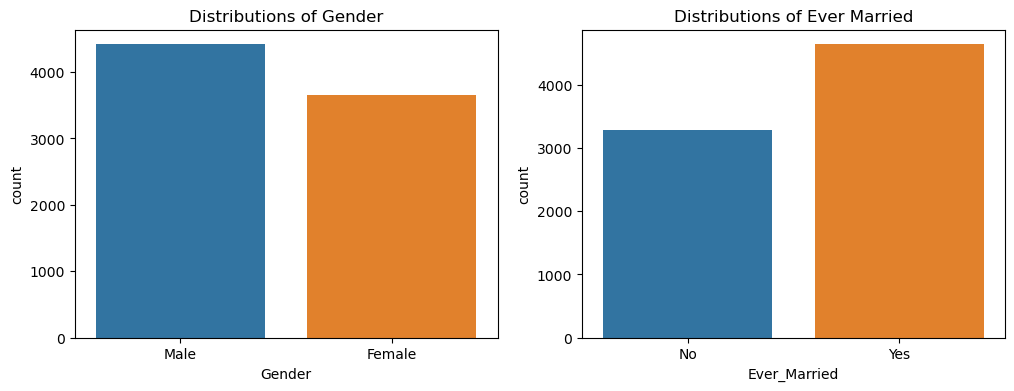

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=train['Gender'])
plt.title("Distributions of Gender")

plt.subplot(1,2,2)
sns.countplot(x=train['Ever_Married'])
plt.title("Distributions of Ever Married")
plt.show()

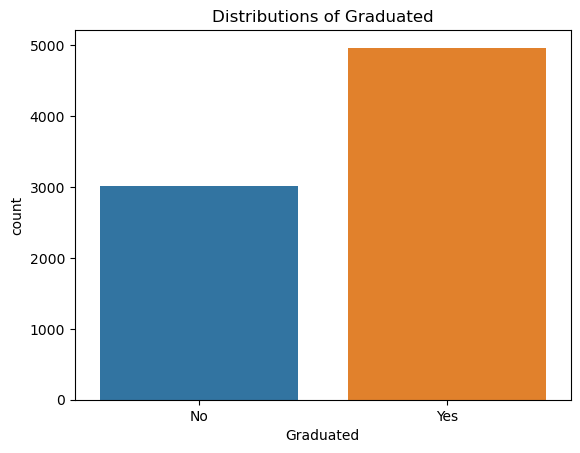

In [6]:
sns.countplot(x=train['Graduated'])
plt.title("Distributions of Graduated")
plt.show()

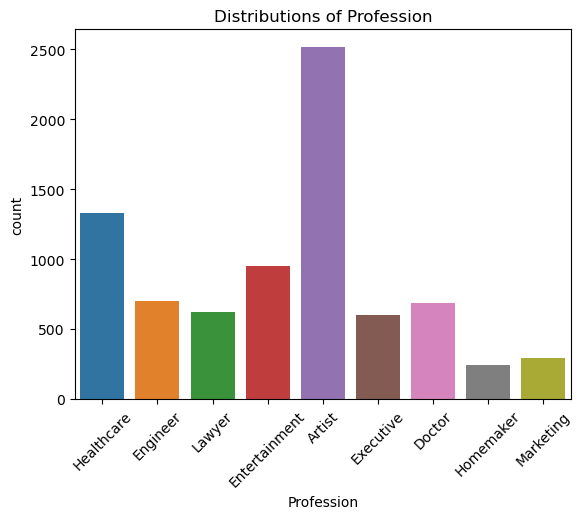

In [7]:
sns.countplot(x=train['Profession'])
plt.title("Distributions of Profession")
plt.xticks(rotation=45)
plt.show()

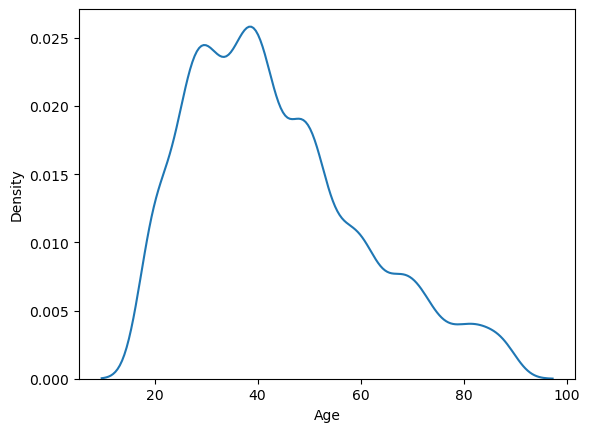

In [8]:
sns.kdeplot(train['Age'])
plt.show()

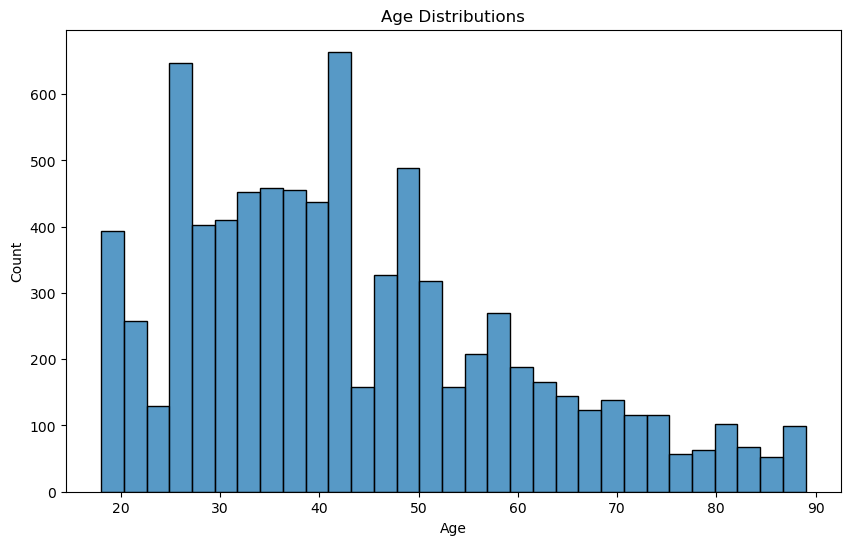

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'])
plt.title("Age Distributions")
plt.show()

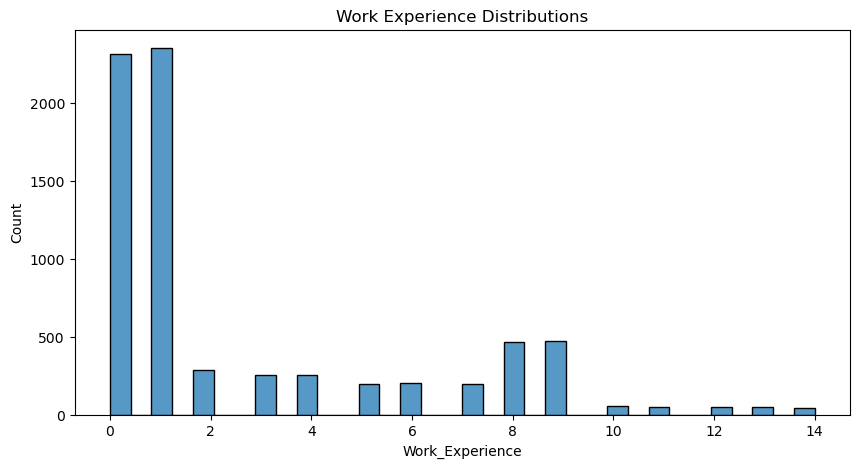

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(train['Work_Experience'])
plt.title("Work Experience Distributions")
plt.show()

In [55]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [56]:
df = pd.concat([train_df, test_df])

In [57]:
df = df.dropna()

In [58]:
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [59]:
print("Gender: ", df['Gender'].unique())
print("Ever_Married: ", df['Ever_Married'].unique())
print("Graduated: ", df['Graduated'].unique())

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes']
Graduated:  ['No' 'Yes']


In [60]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Ever_Married'] = df['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Graduated'] = df['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [61]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [92]:
df['Work_Experience'].unique()

array([ 1.,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,  6.,
       10., 11.])

In [62]:
df['Spending_Score'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Spending_Score'].replace(to_replace = 'Average', value = 1, inplace = True)
df['Spending_Score'].replace(to_replace = 'High', value = 2, inplace = True)

In [63]:
df = df.dropna()

In [64]:
df['Var_1'].unique()


array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [65]:
df['Var_1'].replace(to_replace = 'Cat_1', value = 1, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_2', value = 2, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_3', value = 3, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_4', value = 4, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_5', value = 5, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_6', value = 6, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_7', value = 7, inplace = True)

In [66]:
df['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [67]:
df['Segmentation'].replace(to_replace = 'A', value = 0, inplace = True)
df['Segmentation'].replace(to_replace = 'B', value = 1, inplace = True)
df['Segmentation'].replace(to_replace = 'C', value = 2, inplace = True)
df['Segmentation'].replace(to_replace = 'D', value = 3, inplace = True)

In [68]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,0,0,35,1,Entertainment,1.0,0,2.0,6,3
2622,467954,1,0,29,0,Healthcare,9.0,0,4.0,6,1
2623,467958,0,0,35,1,Doctor,1.0,0,1.0,6,0
2625,467961,1,1,47,1,Executive,1.0,2,5.0,4,2


In [69]:
label ={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

In [70]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']].values
x

array([[ 1.,  0., 22., ...,  0.,  4.,  4.],
       [ 0.,  1., 67., ...,  0.,  1.,  6.],
       [ 1.,  1., 67., ...,  2.,  2.,  6.],
       ...,
       [ 0.,  0., 35., ...,  0.,  1.,  6.],
       [ 1.,  1., 47., ...,  2.,  5.,  4.],
       [ 0.,  0., 43., ...,  0.,  3.,  7.]])

In [71]:
y = df.iloc[:, 10].values
y

array([3, 1, 1, ..., 0, 2, 0], dtype=int64)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)


In [73]:
print(x_train.shape)

(6173, 8)


LR

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [81]:
model = LogisticRegression(max_iter = 700)
model.fit(x_train, y_train)


LogisticRegression(max_iter=700)

In [82]:
y_pred_lr = model.predict(x_test)

In [83]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.436130007558579


In [86]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.36      0.35      0.35       671
           1       0.28      0.10      0.15       613
           2       0.45      0.59      0.51       646
           3       0.52      0.67      0.58       716

    accuracy                           0.44      2646
   macro avg       0.40      0.43      0.40      2646
weighted avg       0.41      0.44      0.41      2646



In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [87]:
y_pred_rf = model_rf.predict(x_test)

In [88]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.40249433106575966


In [89]:
import pickle 

In [90]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))